# parameter explornation

## size square

In [1]:
import math

In [2]:
math.sqrt(2880**2+1800**2)

3396.2332075403774

In [3]:
2880*1800

5184000

## DPI

In [4]:
math.sqrt(2880**2+1800**2)/15.4

220.53462386625827

## dot pitch

each pixel size

In [5]:
1*2.54/(math.sqrt(2880**2+1800**2)/15.4)

0.011517465853980216

## ppi suqare

In [7]:
(math.sqrt(2880**2+1800**2)/15.4)**2

48635.52032383201

In [8]:
220**2

48400

notes: so ppi is not defined but cal by pixel counts with screen size

# practice

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
from IPython.display import HTML, display

In [53]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## original parameter setting

```
for MacBook Pro (Retina, 15-inch, Mid 2015)
15.4－inch (2880 x 1800)
```

In [10]:
px_counts = (2880, 1800)

In [11]:
screen_size = 15.4

## plotting

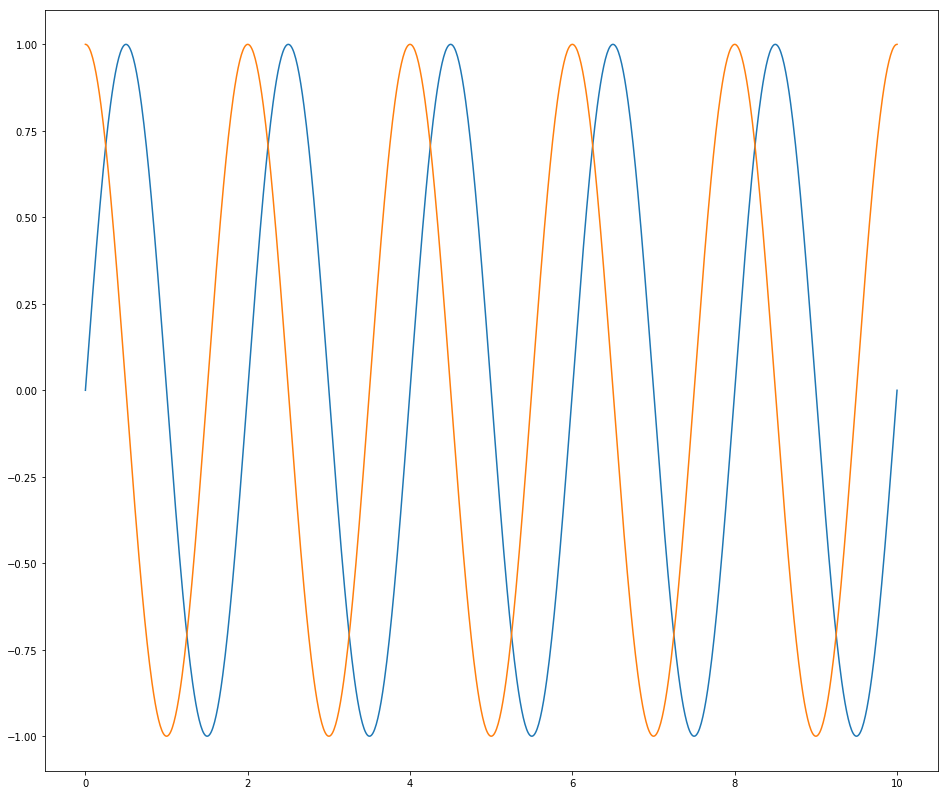

In [78]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots(1,figsize=(16,14))
ax.plot(x, np.sin(np.pi*x), label='sin(x)', linewidth=1.5)
ax.plot(x, np.cos(np.pi*x), label='cos(y)', linewidth=1.5)

## output save

In [36]:
fig.tight_layout()

In [73]:
def image_link(filename):
    fig.savefig(filename)
    return HTML('<a href="{0}", target="_blank">{0}</a>'.format(filename))

In [81]:
#rcParams["savefig.format"]

'pdf'

### default output 432\*288 px pic whose size is 6\*4 inch

when I open it and find its size 6\*4 inch

In [83]:
rcParams['figure.figsize']

[6.0, 4.0]

In [43]:
rcParams['figure.dpi']

72.0

In [30]:
432/6

72.0

In [38]:
432/6, 288/4

(72.0, 72.0)

## code plt.subplots(1,figsize=(16,14)) means that you can input inch 

In [80]:
image_link('demo.png')

In [39]:
fig.tight_layout

<bound method Figure.tight_layout of <Figure size 1152x1008 with 1 Axes>>

default dpi is 72
![](https://ws3.sinaimg.cn/large/006tNc79ly1fyt6zniiizj30vq0u0dm1.jpg)

In [41]:
1152/72,1008/72

(16.0, 14.0)

## retina screen show pic correctly

input size(inch) and dpi to get a pic, and as I open it, I found the size of output is equal to the size of std.

## use software to inspect this pics

In [84]:
rcParams['figure.dpi'] = 300

In [85]:
image_link('demo.png')

In [86]:
rcParams['figure.dpi']

300.0

this doesn't work

In [87]:
def image_link(filename):
    fig.savefig(filename,dpi=300)
    return HTML('<a href="{0}", target="_blank">{0}</a>'.format(filename))

In [88]:
image_link('demo.png')

![](https://ws1.sinaimg.cn/large/006tNc79ly1fyt74wfs0fj30vq0u0455.jpg)

from the Preflight output, we can make conclusions:
 * inputs are size(inch) and dpi, then pixel counts are caled: 
 
 $$ counts(pixel) = size * dpi $$
 
 * the pixel counts don't affect the pic size
 
 * dot term is common in printing. It's a absolute length term as 
 $$ 72(dot) = 1(inch) $$
 
 * the interesting thing is: as you scale the pic in real size in different software, the results are different.
 
 If you open the pic in preview in MacOS and scale to real size, the size is large. (the screen 2880\*1800px cannot endure 4800\*4200px, to be exactually, pic shown not depend on physical resolution 2880\*1800px, but logic resolution 1440\*900px, so showing is (4800/1440,4200/900) larger than screen).
 ~~But if you open it in Acrobat Pro and scale to real size, the size is small as it actually use 1152\*1008pt to show. Although the screen is 2880\*1800px, it is Physical resolution actually. In contrast, the screen use 
Logical resolution 1440\*900px~~
But if you open it in Acrobat Pro and scale to real size, the size is small as it actually use size(inch) input to scale. (not 2880\*1800px, not 1440\*900px, but 15.4 inch).

This tells us, the software judge output differently. And we care about output shown in PPT, how it works?

[CMM](https://www.cambridgeincolour.com/tutorials/color-space-conversion.htm)

# to show in PPT

## size problem

Text(0.5,1,'Font size demo')

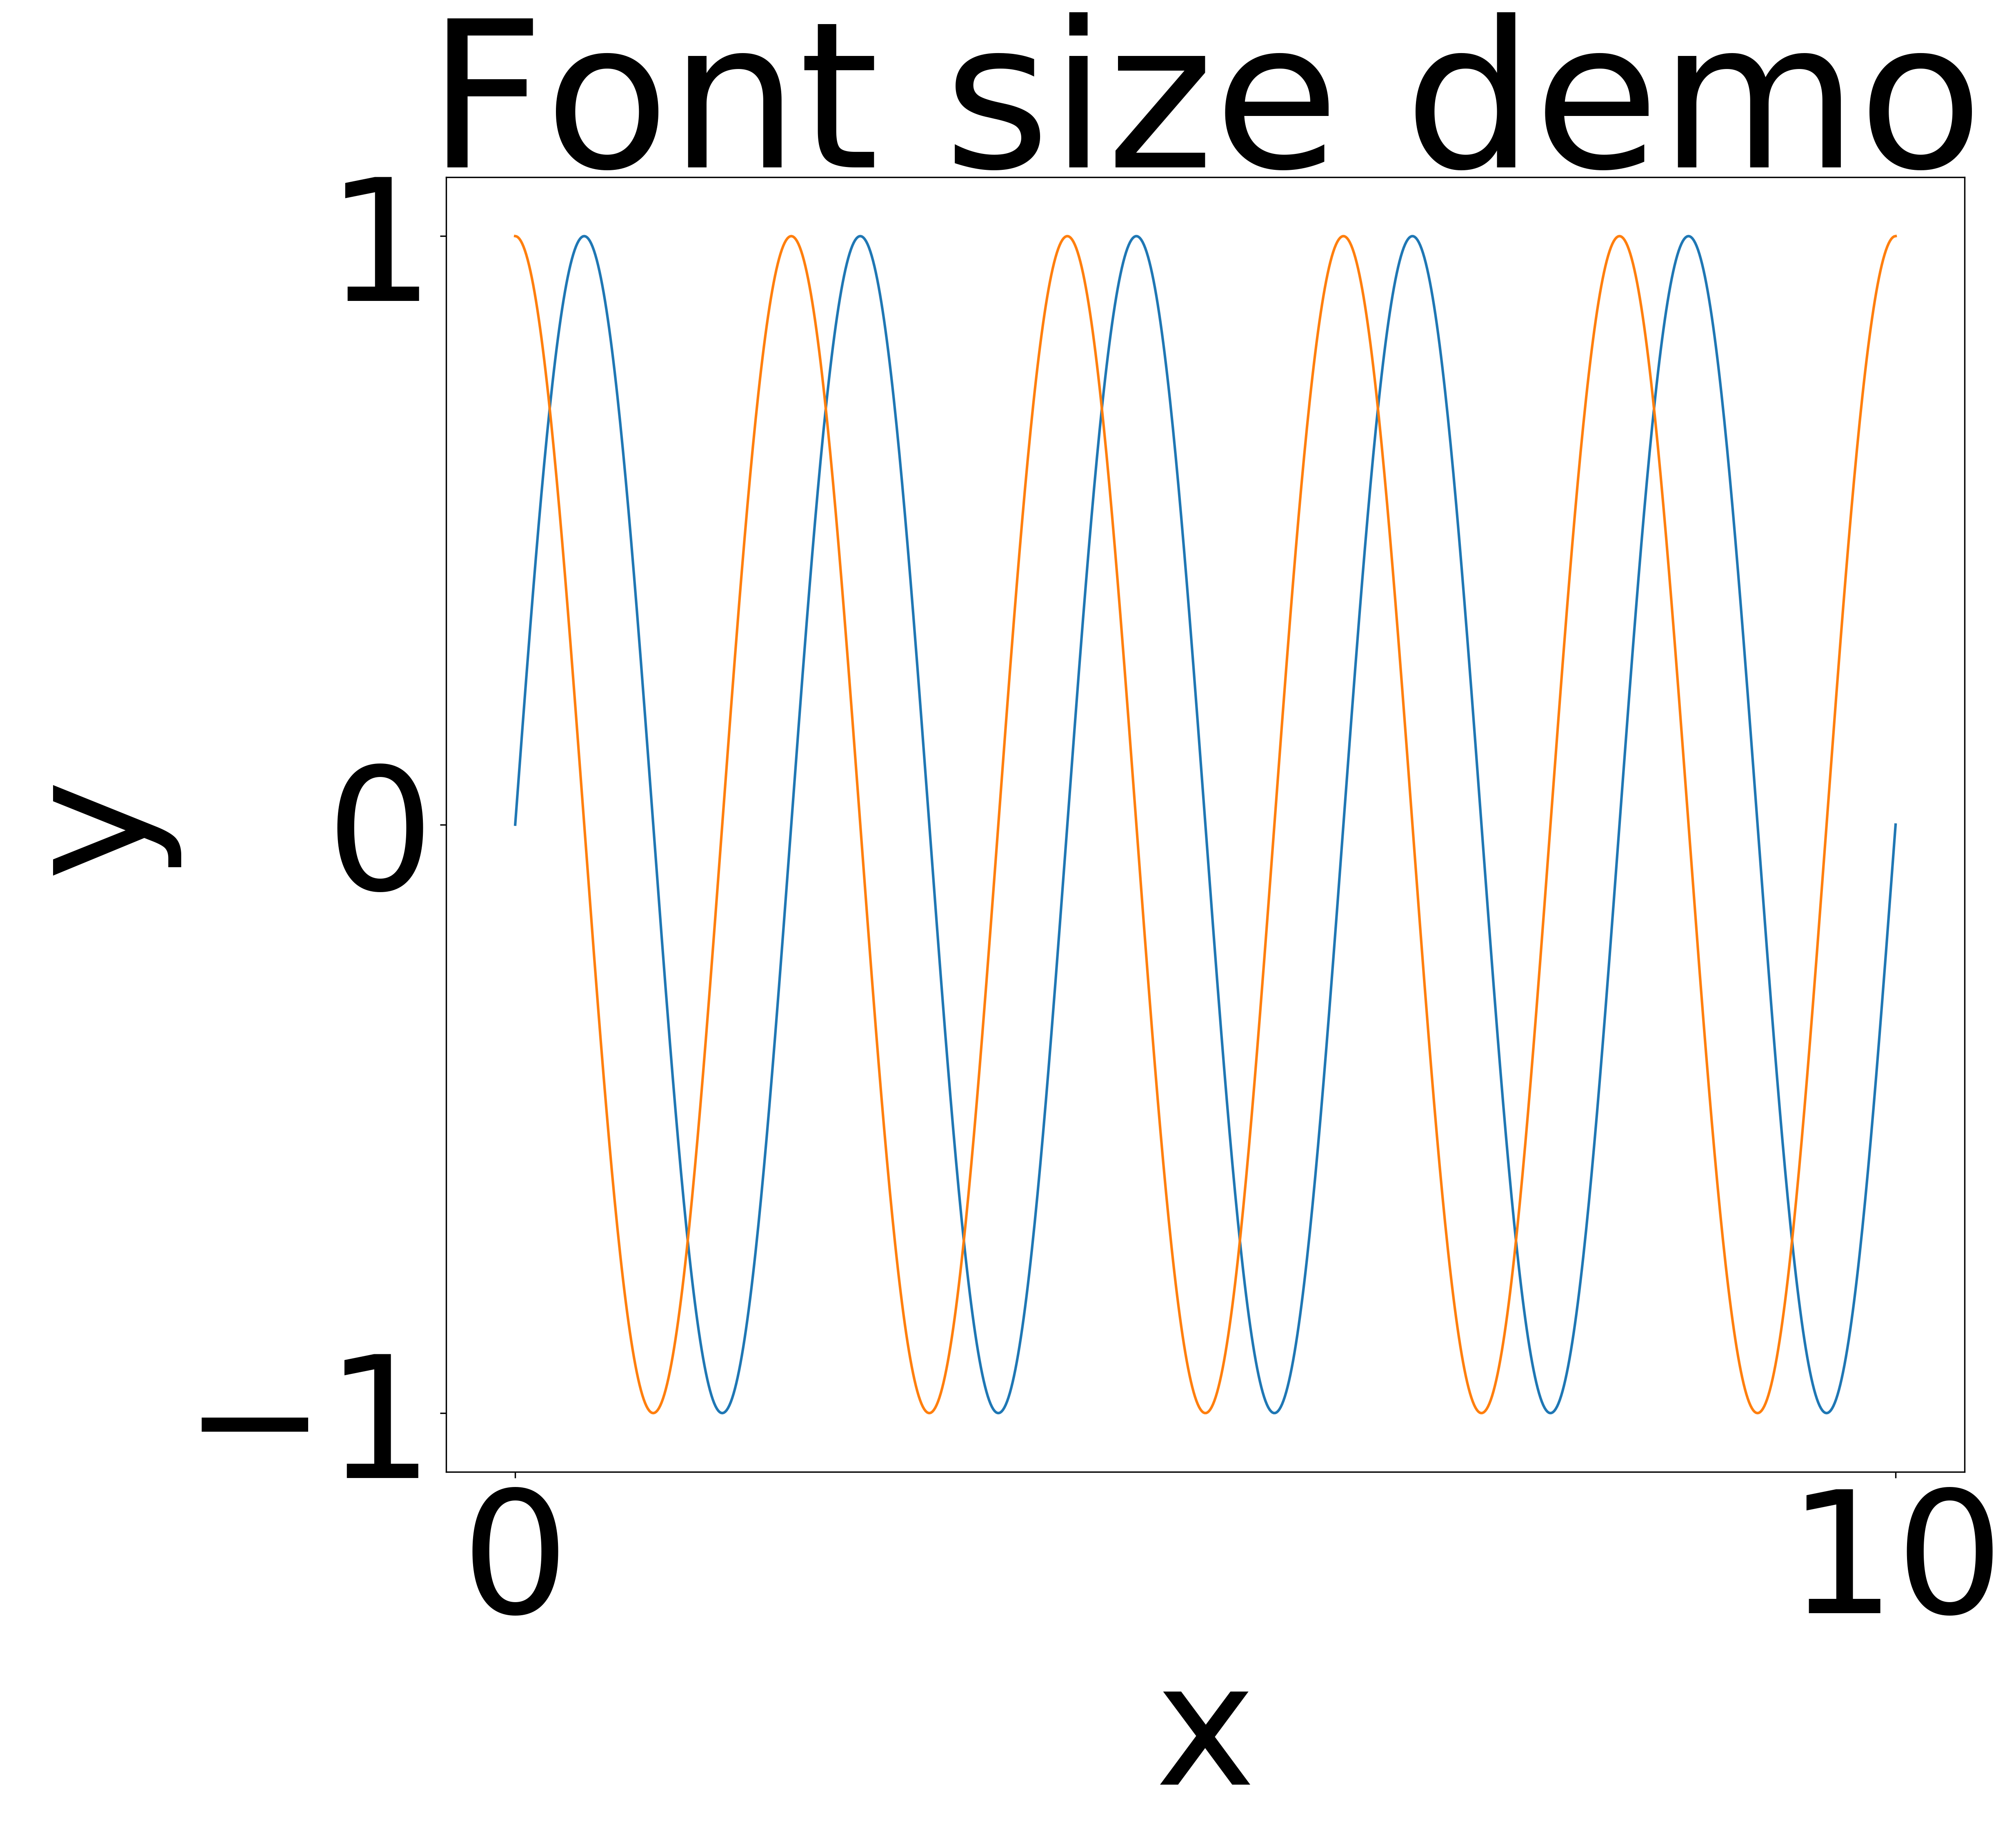

In [139]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots(1,figsize=(16,14))
ax.plot(x, np.sin(np.pi*x), label='sin(x)', linewidth=1.5)
ax.plot(x, np.cos(np.pi*x), label='cos(y)', linewidth=1.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Font size demo')

In [97]:
fig.tight_layout()

In [141]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 72

In [135]:
def image_link(filename):
    fig.savefig(filename,dpi=300)
    return HTML('<a href="{0}", target="_blank">{0}</a>'.format(filename))

In [142]:
image_link('demo.png')

In [129]:
plt.rcParams['figure.dpi'] 

72.0

In [145]:
16/(14/12.5)

14.285714285714285

PowerPoint is funny. When I set slide 1440\*900px(20\*12.5in, the logical solution of MacBook Pro (Retina, 15-inch, Mid 2015)), I found the slide spread all over the screen. That is to say, PowerPoint regard the screen 20\*12.5in, not 15.4in actually. So what is difference betweent 20\*12.5in and 15.4in? 
PPI, dafault PPI in PowerPoint is 72, but we calculate retina PPI is around 220.
What is worse, when I bring 16\*14in pic in, there are several problems.
* 16\*14in pic --> 14.29\*12.5in pic

so why?
$$ 16/(14/12.5) = 14.29$$
it means PowerPoint automatically scale the pic

* but as PowerPoint informs, orignal size should be adopted. We [S] and show correctly.

The problem here is simple, the silde size is shorter than the pic.

office 365
![](https://ws3.sinaimg.cn/large/006tNc79ly1fytdx61619j31ct0u01a0.jpg)

I get a smaller pic by following codes

Text(0.5,1,'Font size demo')

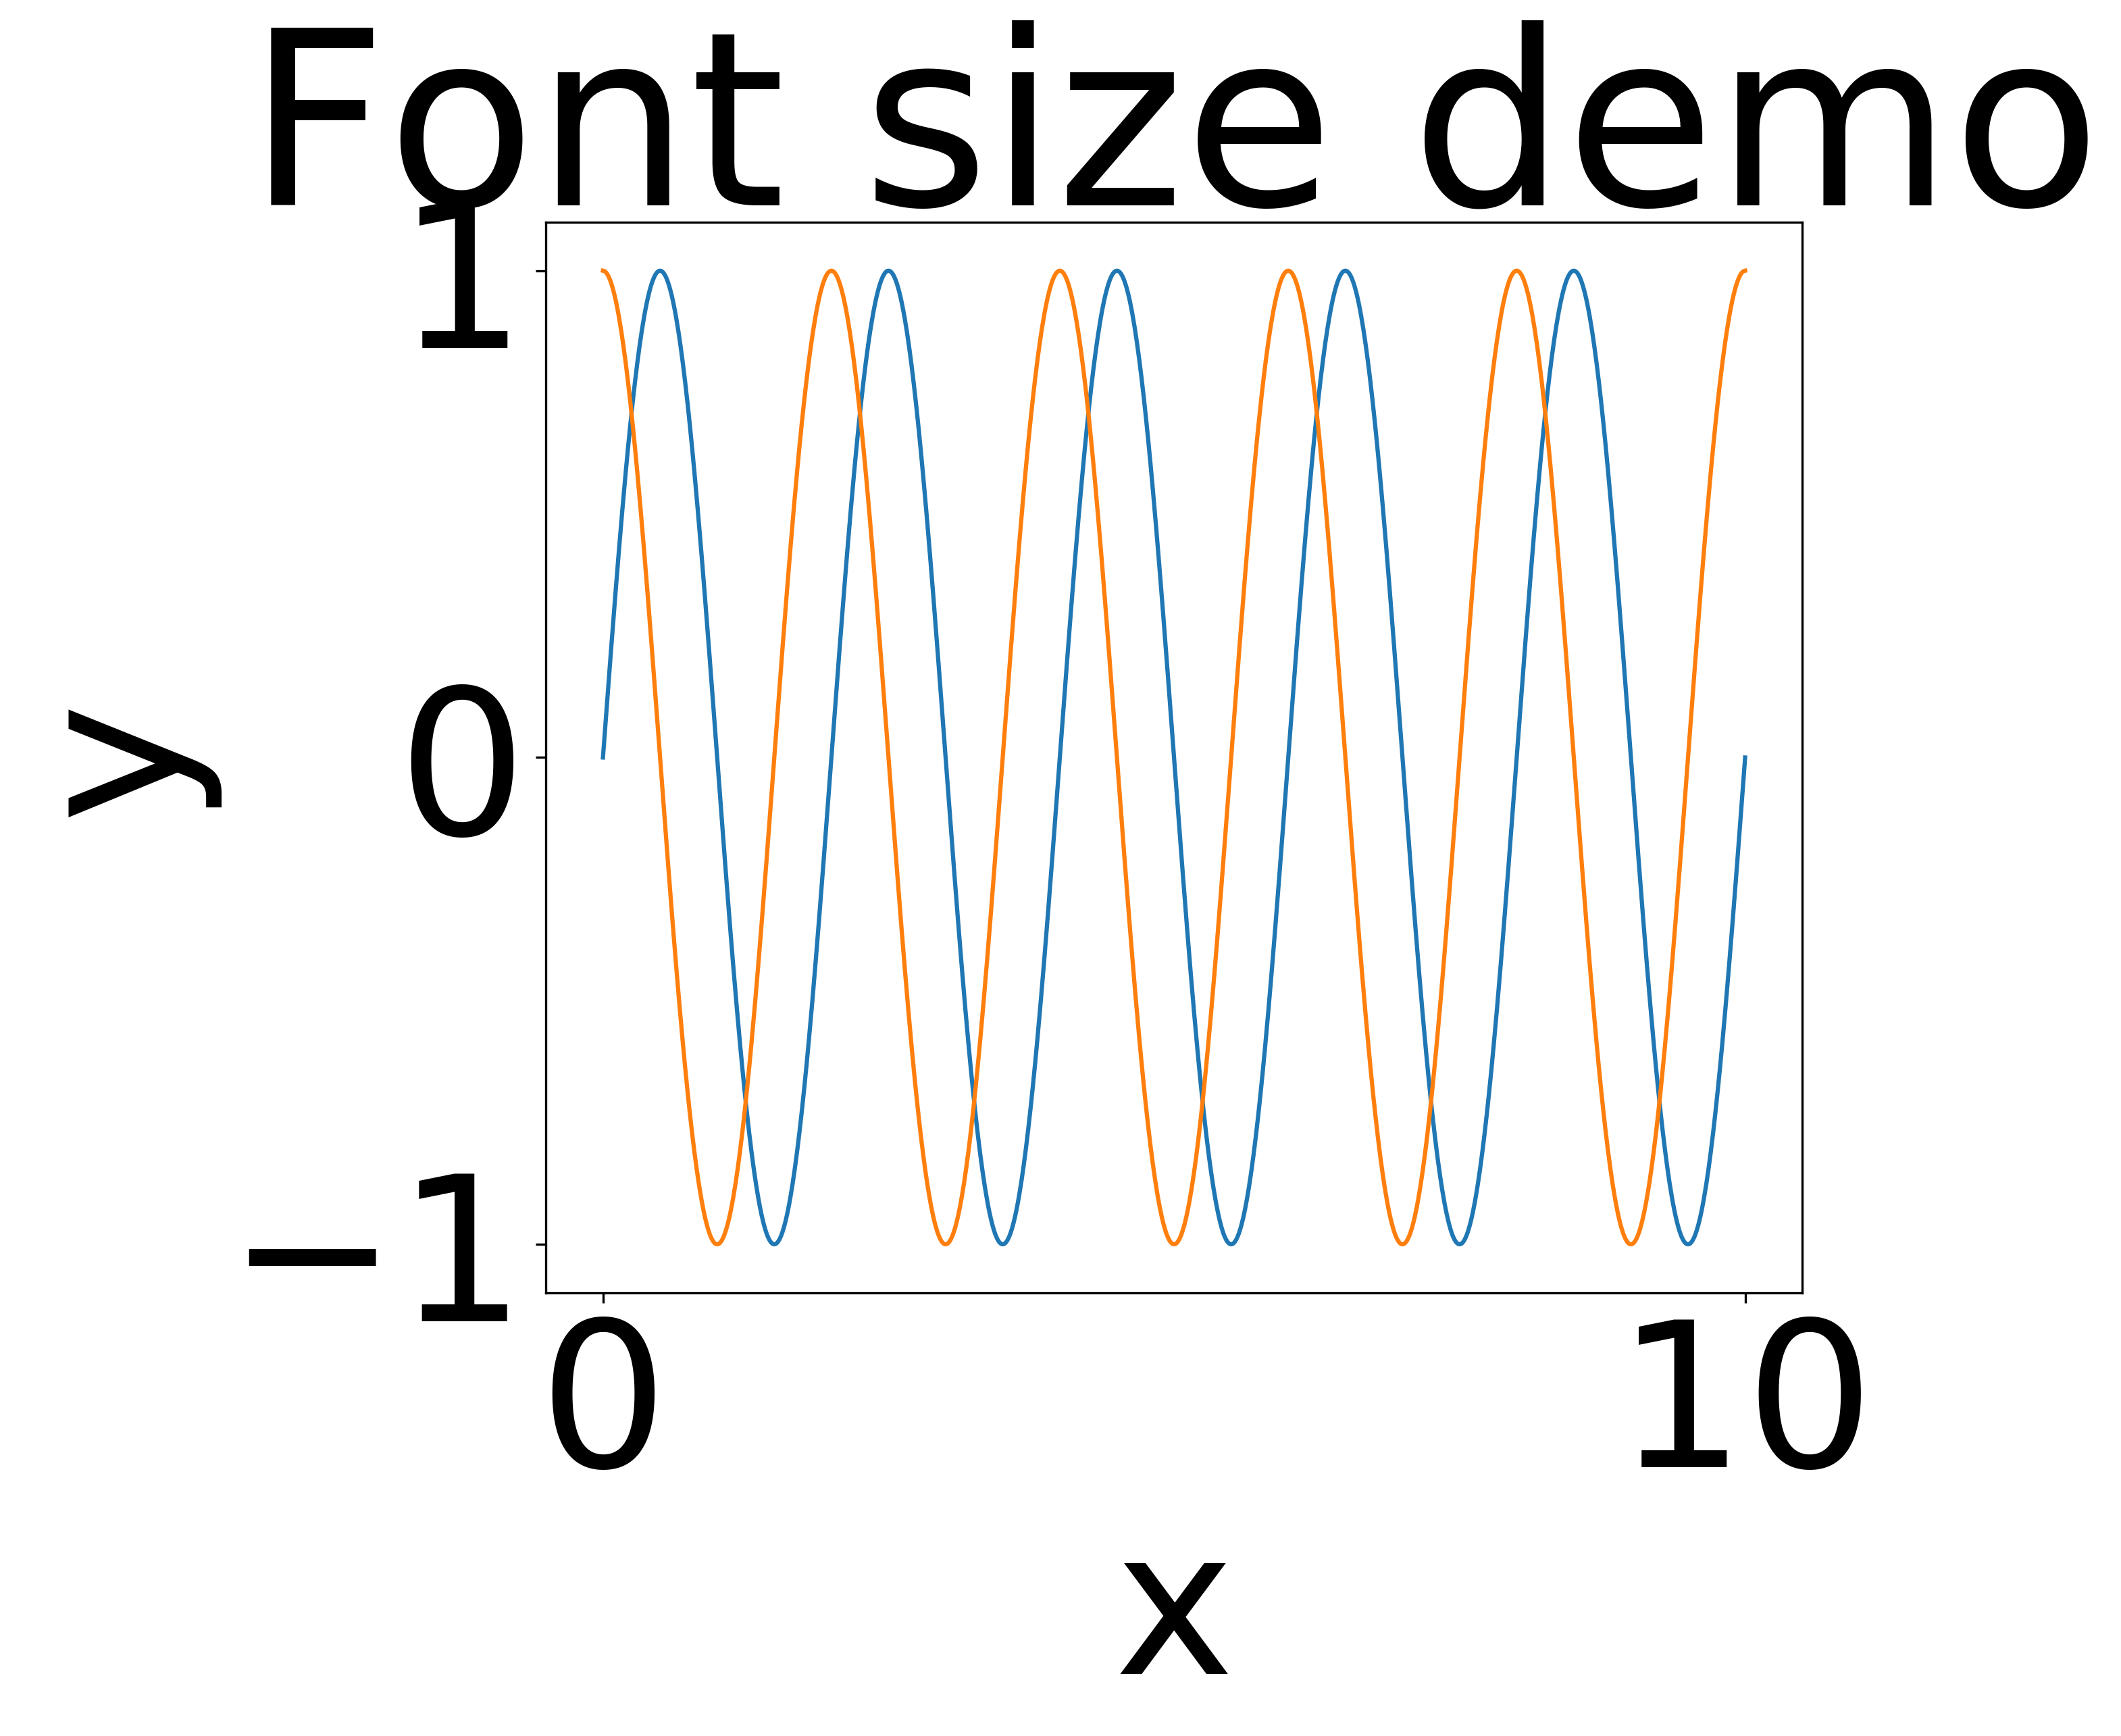

In [146]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots(1,figsize=(8,7))
ax.plot(x, np.sin(np.pi*x), label='sin(x)', linewidth=1.5)
ax.plot(x, np.cos(np.pi*x), label='cos(y)', linewidth=1.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Font size demo')

In [147]:
image_link('demo.png')

There are several ways to bring pic into silde.
* drag the pic from Finder to silde
* open in HTML and copy, paste
I compare these ways using smaller pic 


drag the pic from Finder to silde
![](https://ws1.sinaimg.cn/large/006tNc79ly1fytegny5cgj31ct0u0atd.jpg)
right

open in HTML and copy, paste
![](https://ws3.sinaimg.cn/large/006tNc79ly1fyteiedn1cj31ct0u0x1x.jpg)

In [149]:
16.6666/8*7

14.583274999999999

maybe HTML changed the size because 16.6666/8\*7 equals to 14.58, I don't care about it but use pic file in the folder, ingonring html-copy-paste method.

now size problem settles down. We start to care about font.

## font problem

problem:
* what is font.size mean in rcParams (the corr between font.size and actual size(pt)
* when font.size is too large

### tight_layout effect

#### font.size too large

Text(0.5,1,'Font size demo')

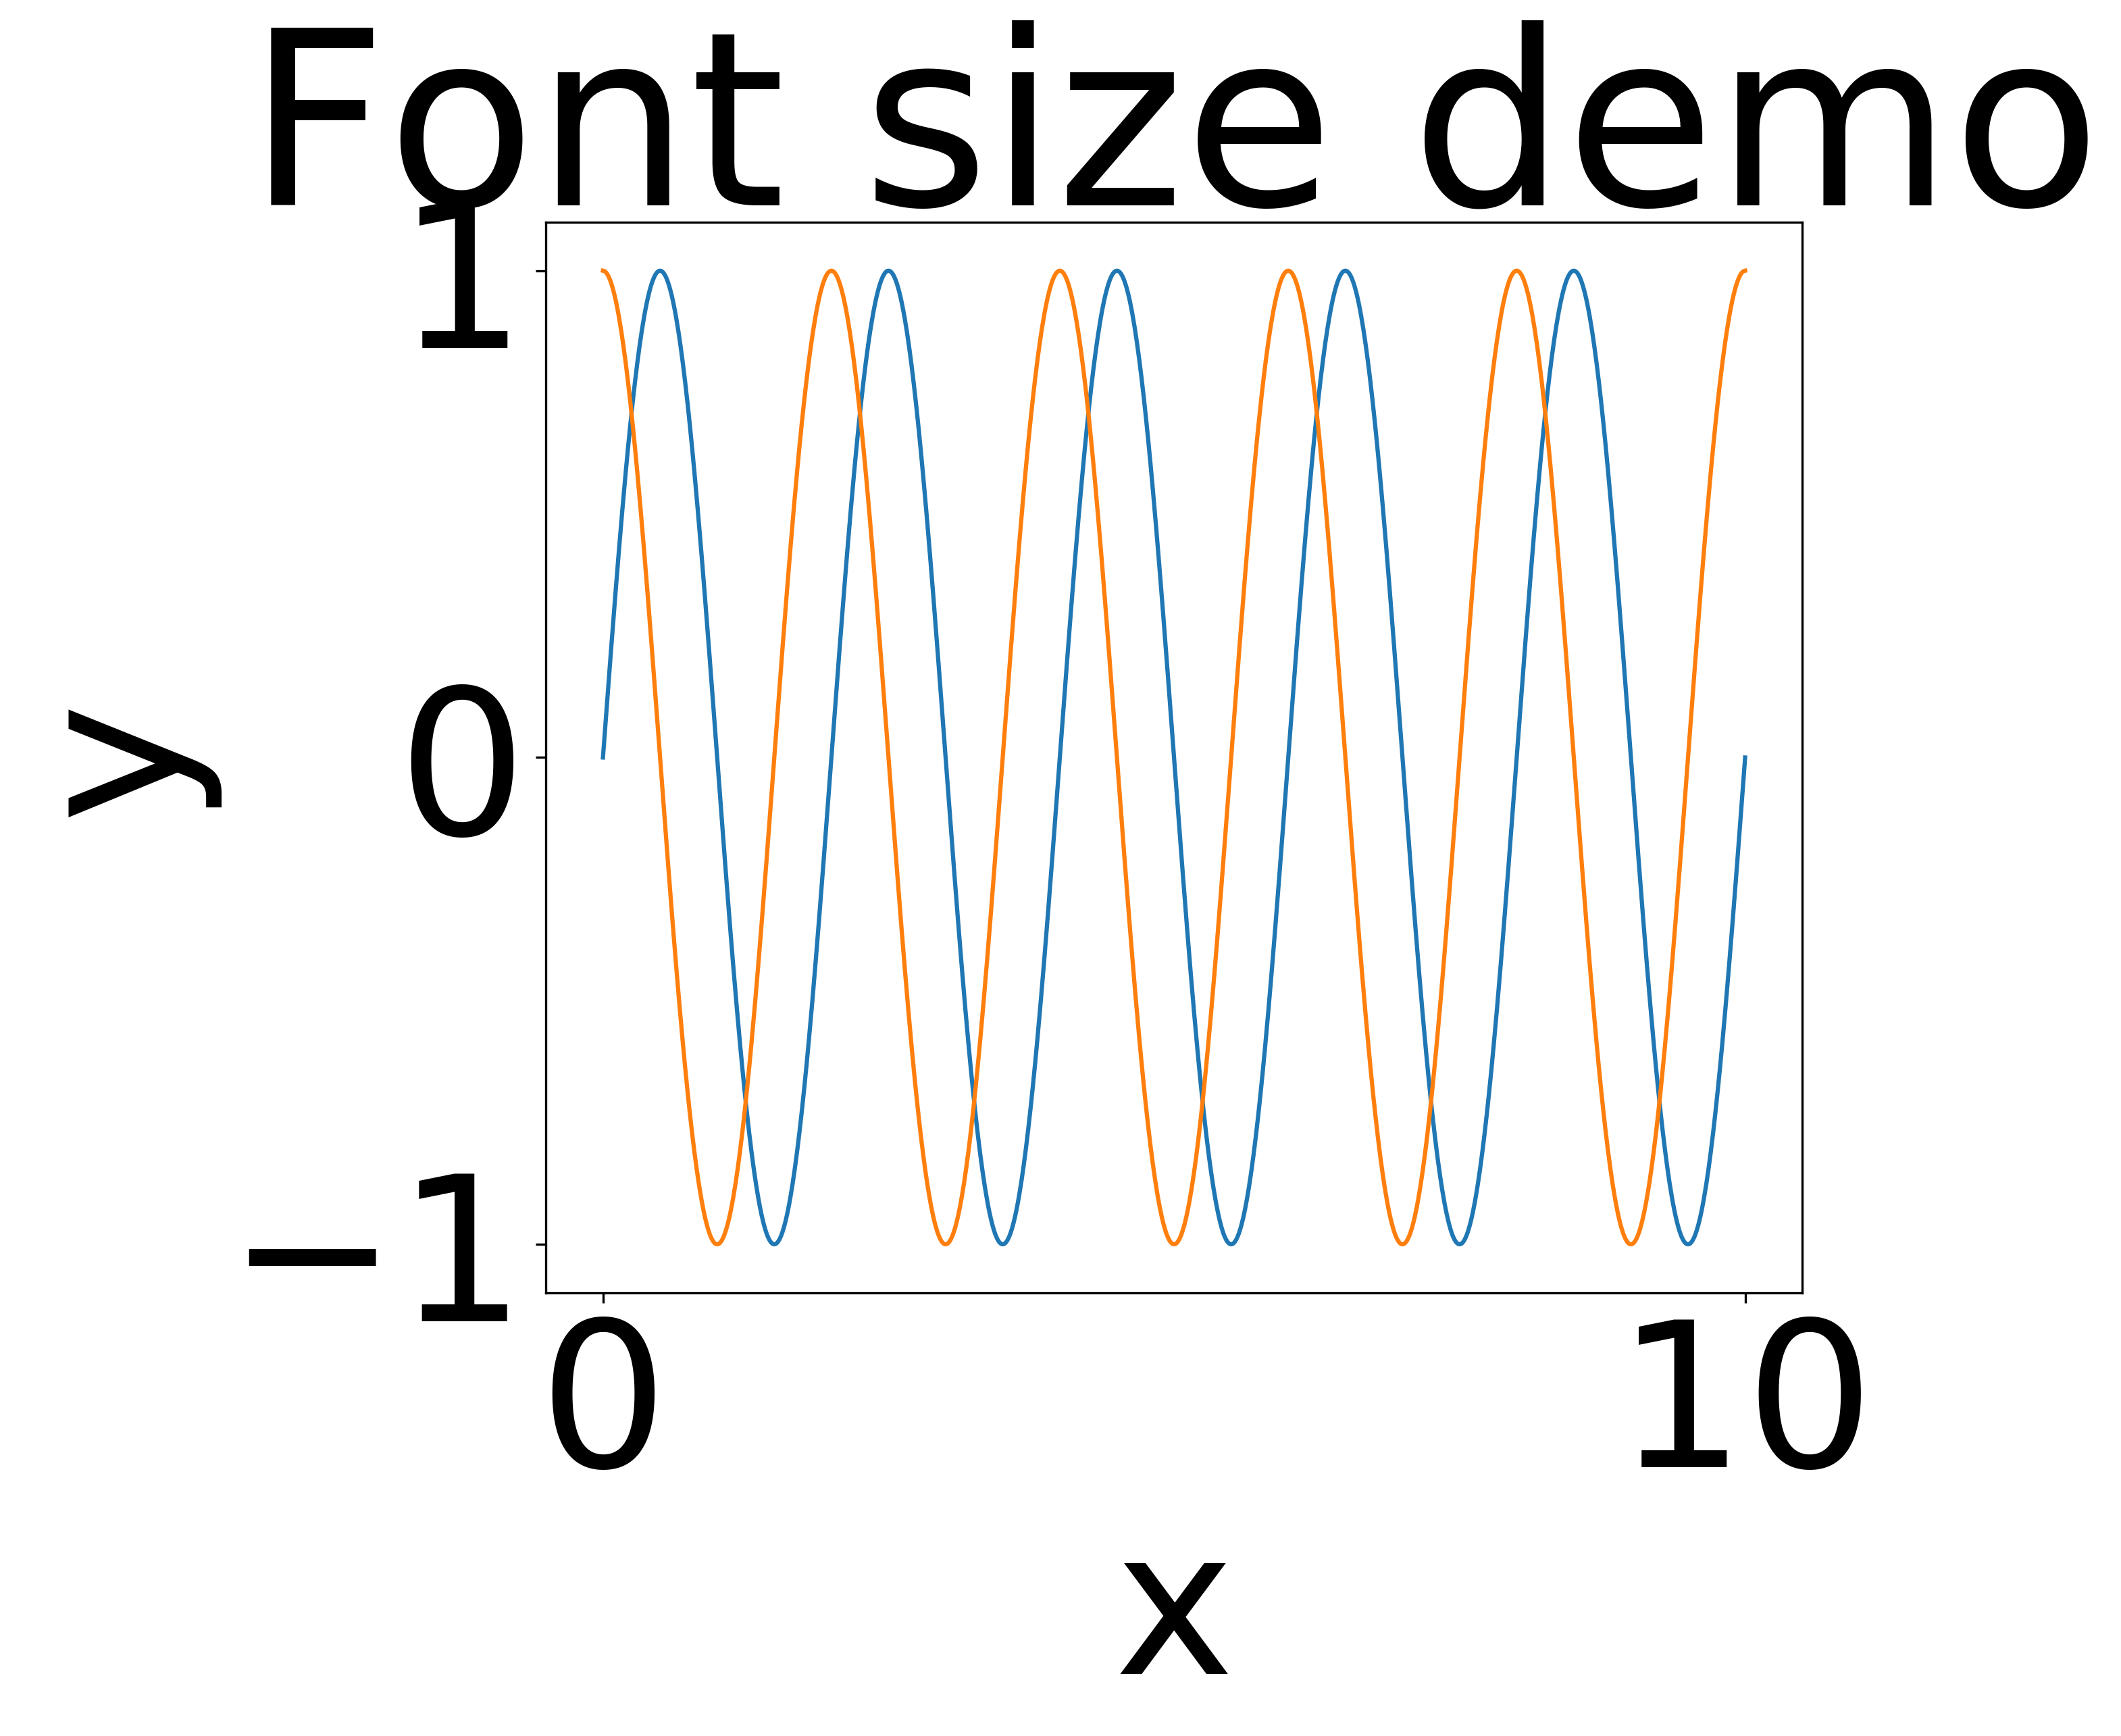

In [151]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 72

x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots(1,figsize=(8,7))
ax.plot(x, np.sin(np.pi*x), label='sin(x)', linewidth=1.5)
ax.plot(x, np.cos(np.pi*x), label='cos(y)', linewidth=1.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Font size demo')

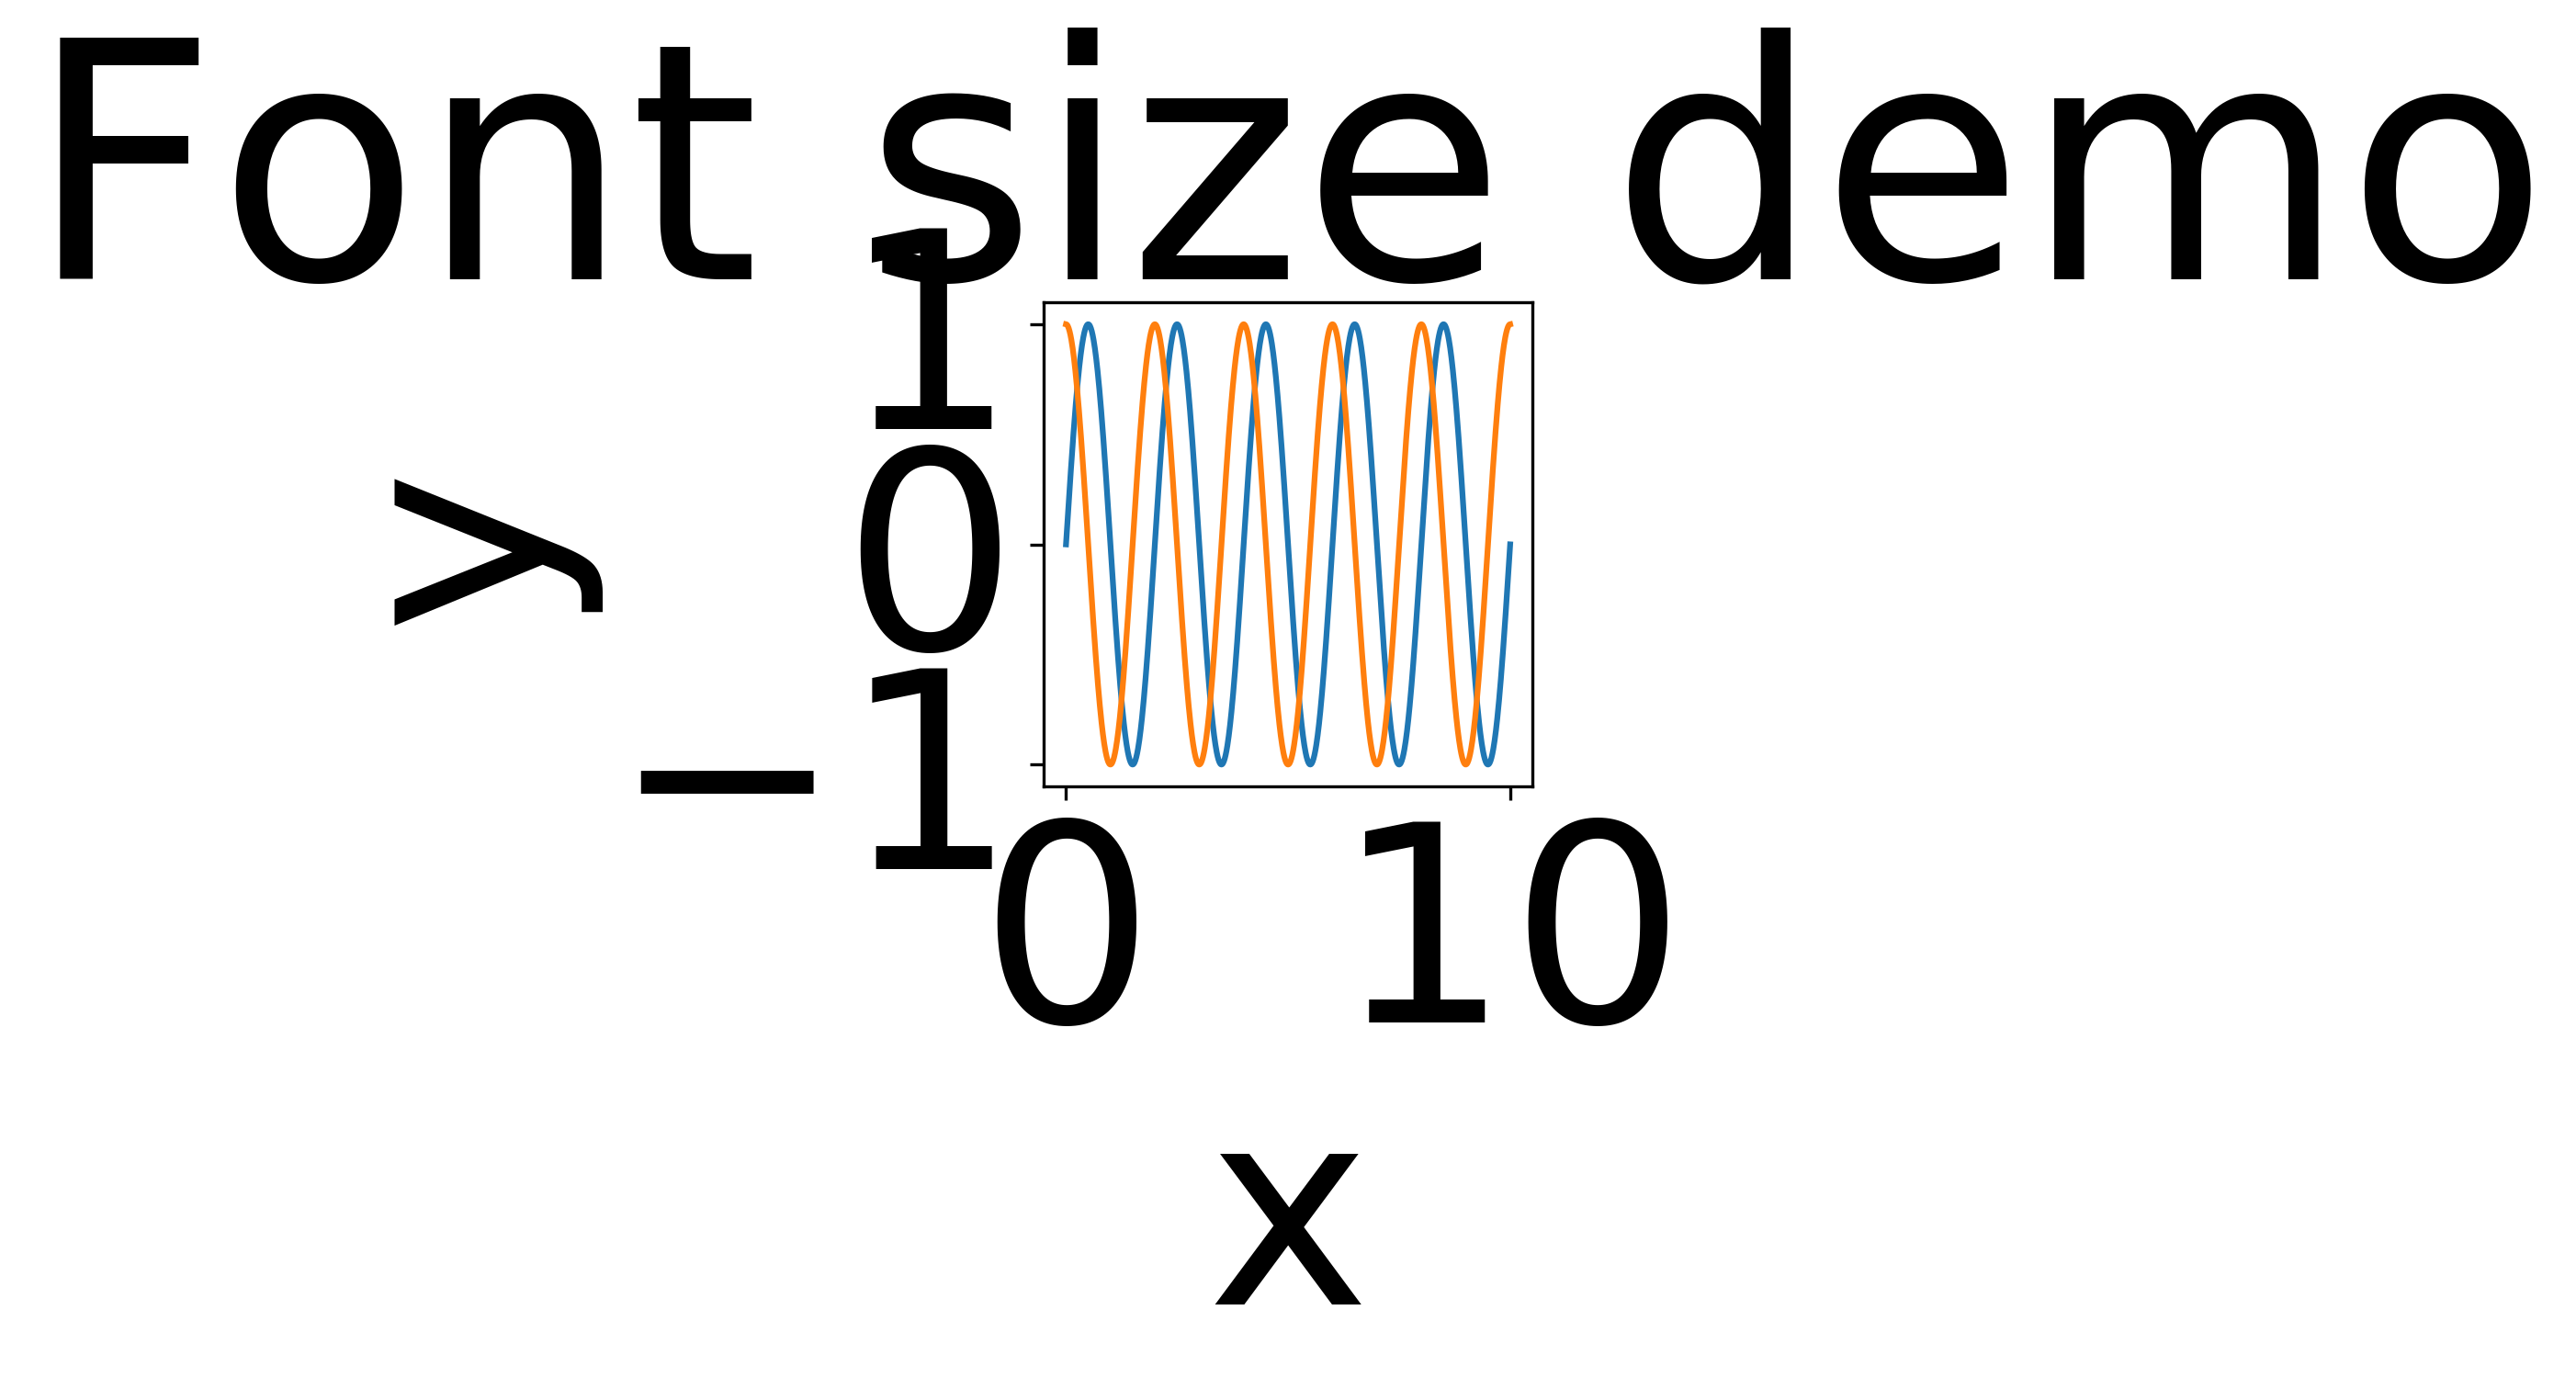

In [154]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 72

x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots(1,figsize=(8,7))
ax.plot(x, np.sin(np.pi*x), label='sin(x)', linewidth=1.5)
ax.plot(x, np.cos(np.pi*x), label='cos(y)', linewidth=1.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Font size demo')
fig.tight_layout()

In [153]:
fig.tight_layout()
image_link('demo.png')

#### font.size common

Text(0.5,1,'Font size demo')

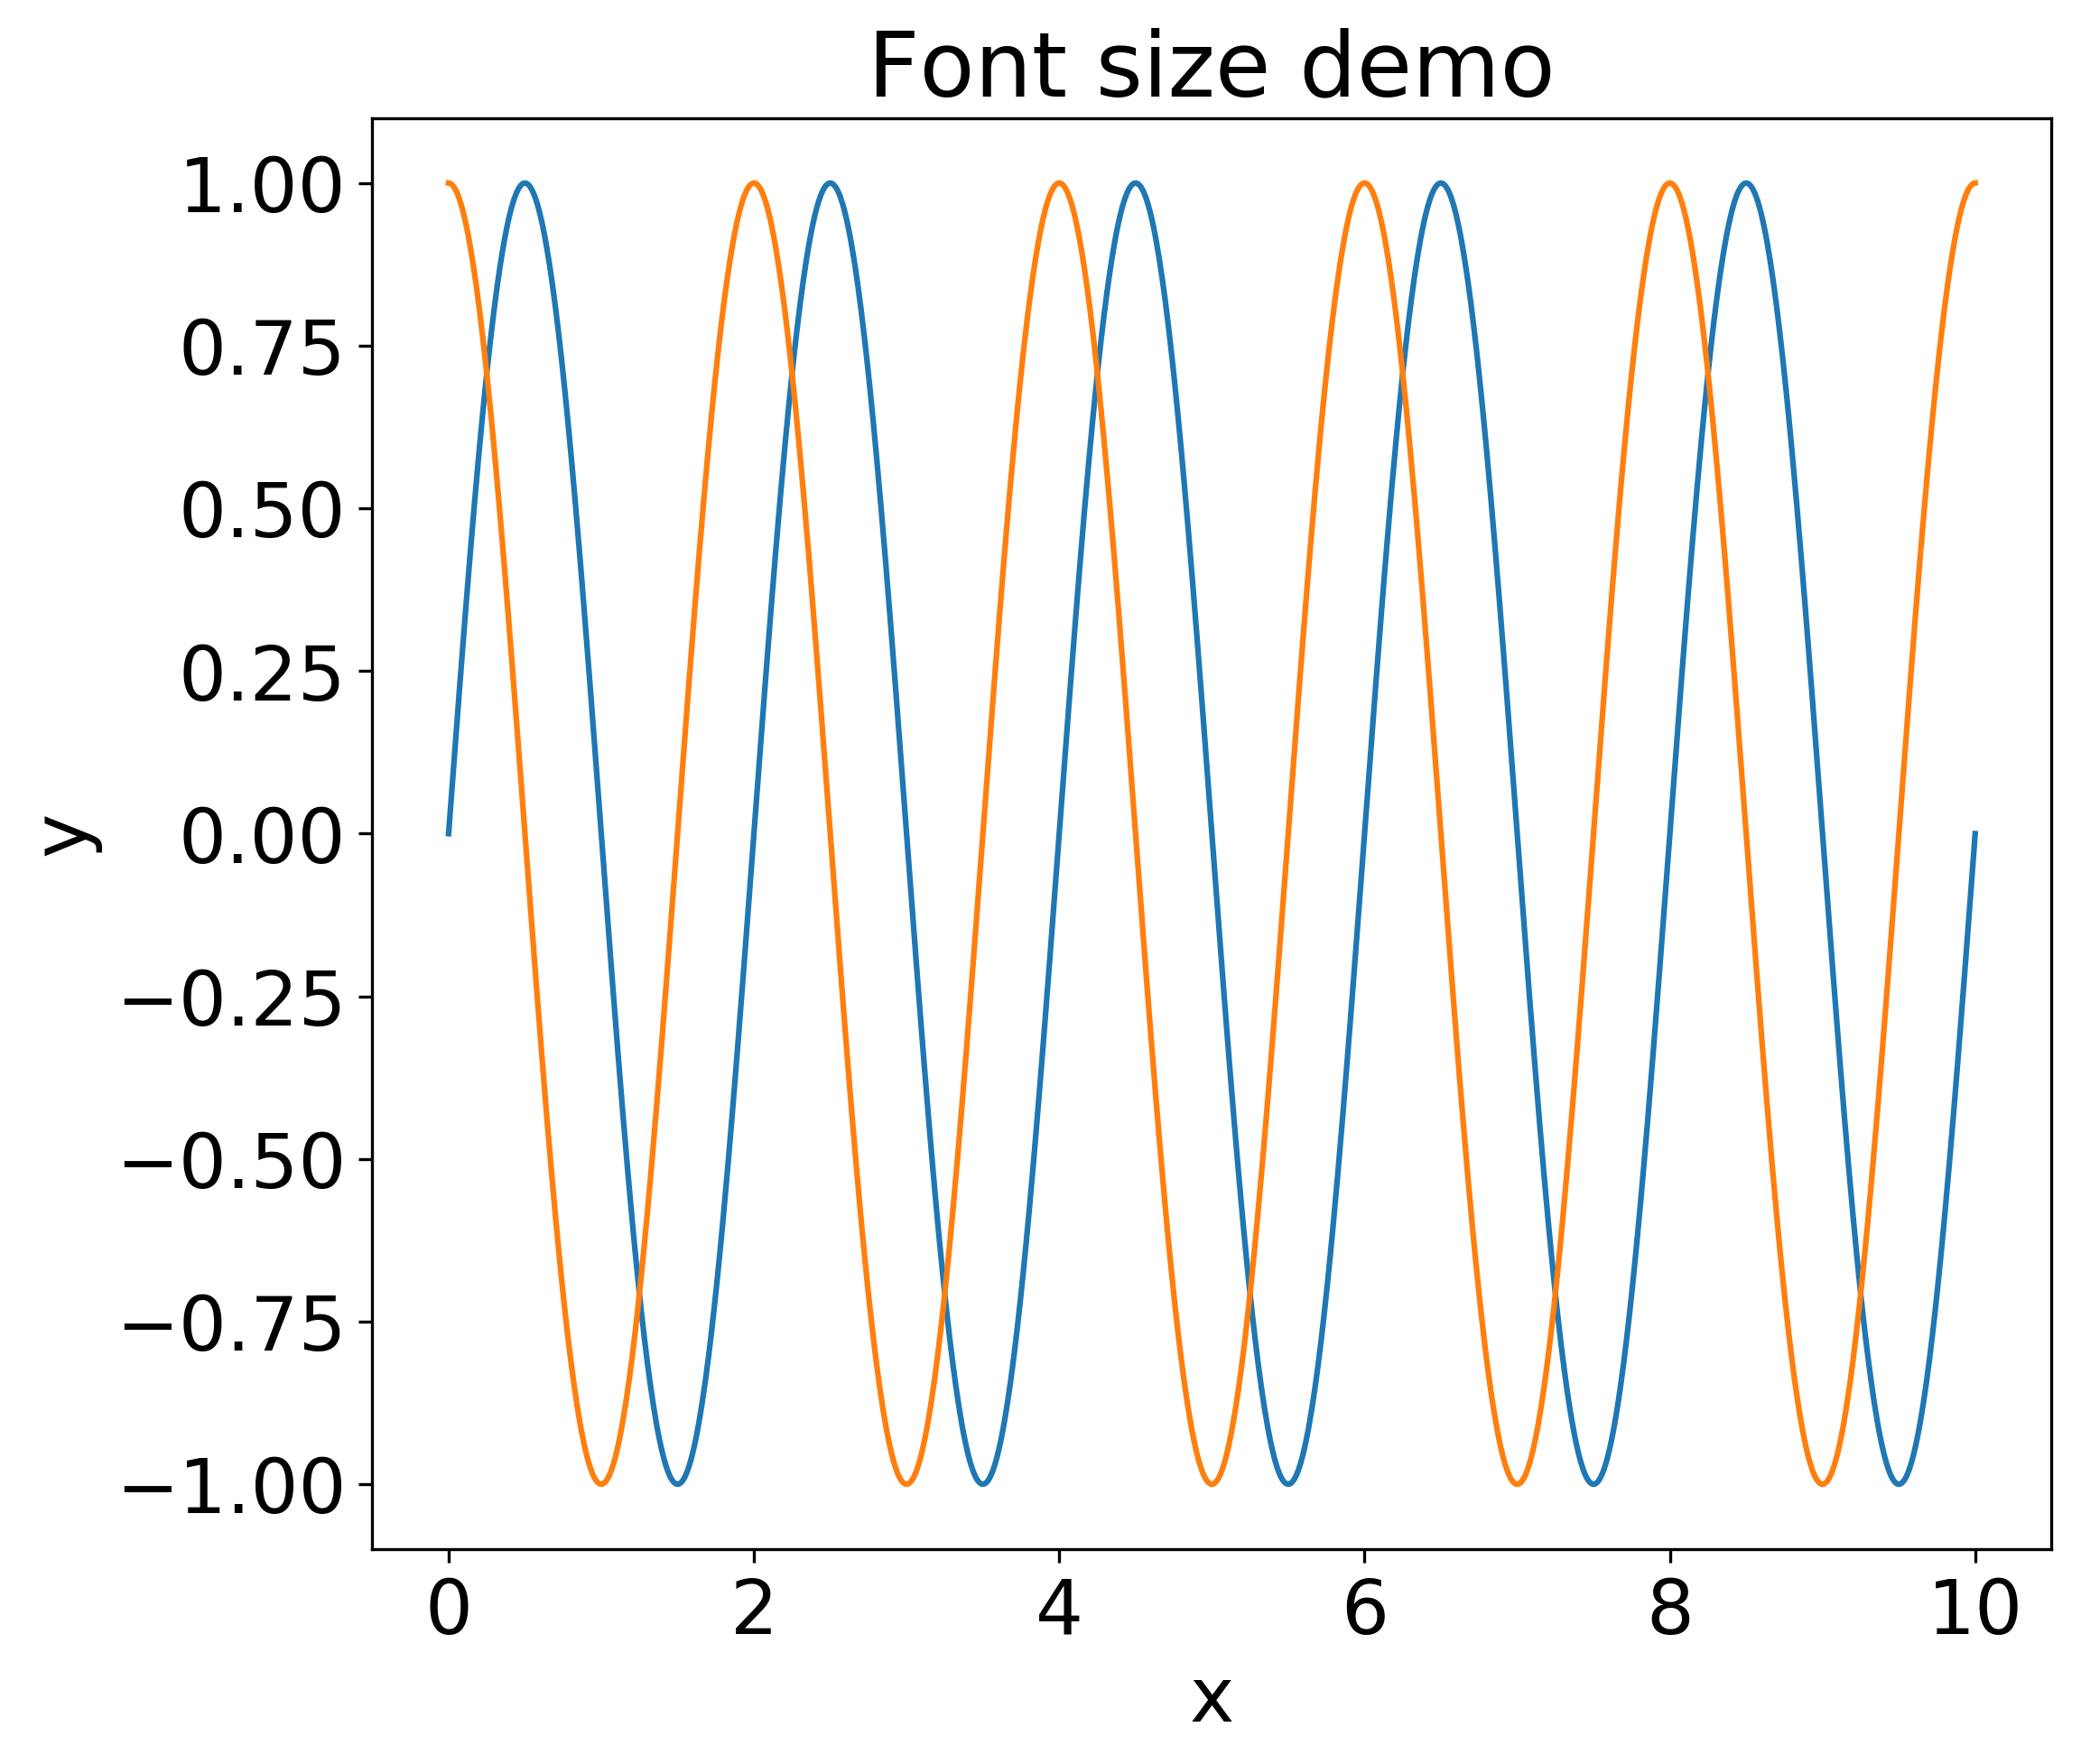

In [156]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 20

x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots(1,figsize=(8,7))
ax.plot(x, np.sin(np.pi*x), label='sin(x)', linewidth=1.5)
ax.plot(x, np.cos(np.pi*x), label='cos(y)', linewidth=1.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Font size demo')

In [158]:
image_link('demo.png')

72 pt = 1 in
![](https://ws1.sinaimg.cn/large/006tNc79ly1fytfb2mtrbj31c00u0tzz.jpg)

Text(0.5,1,'Font size demo')

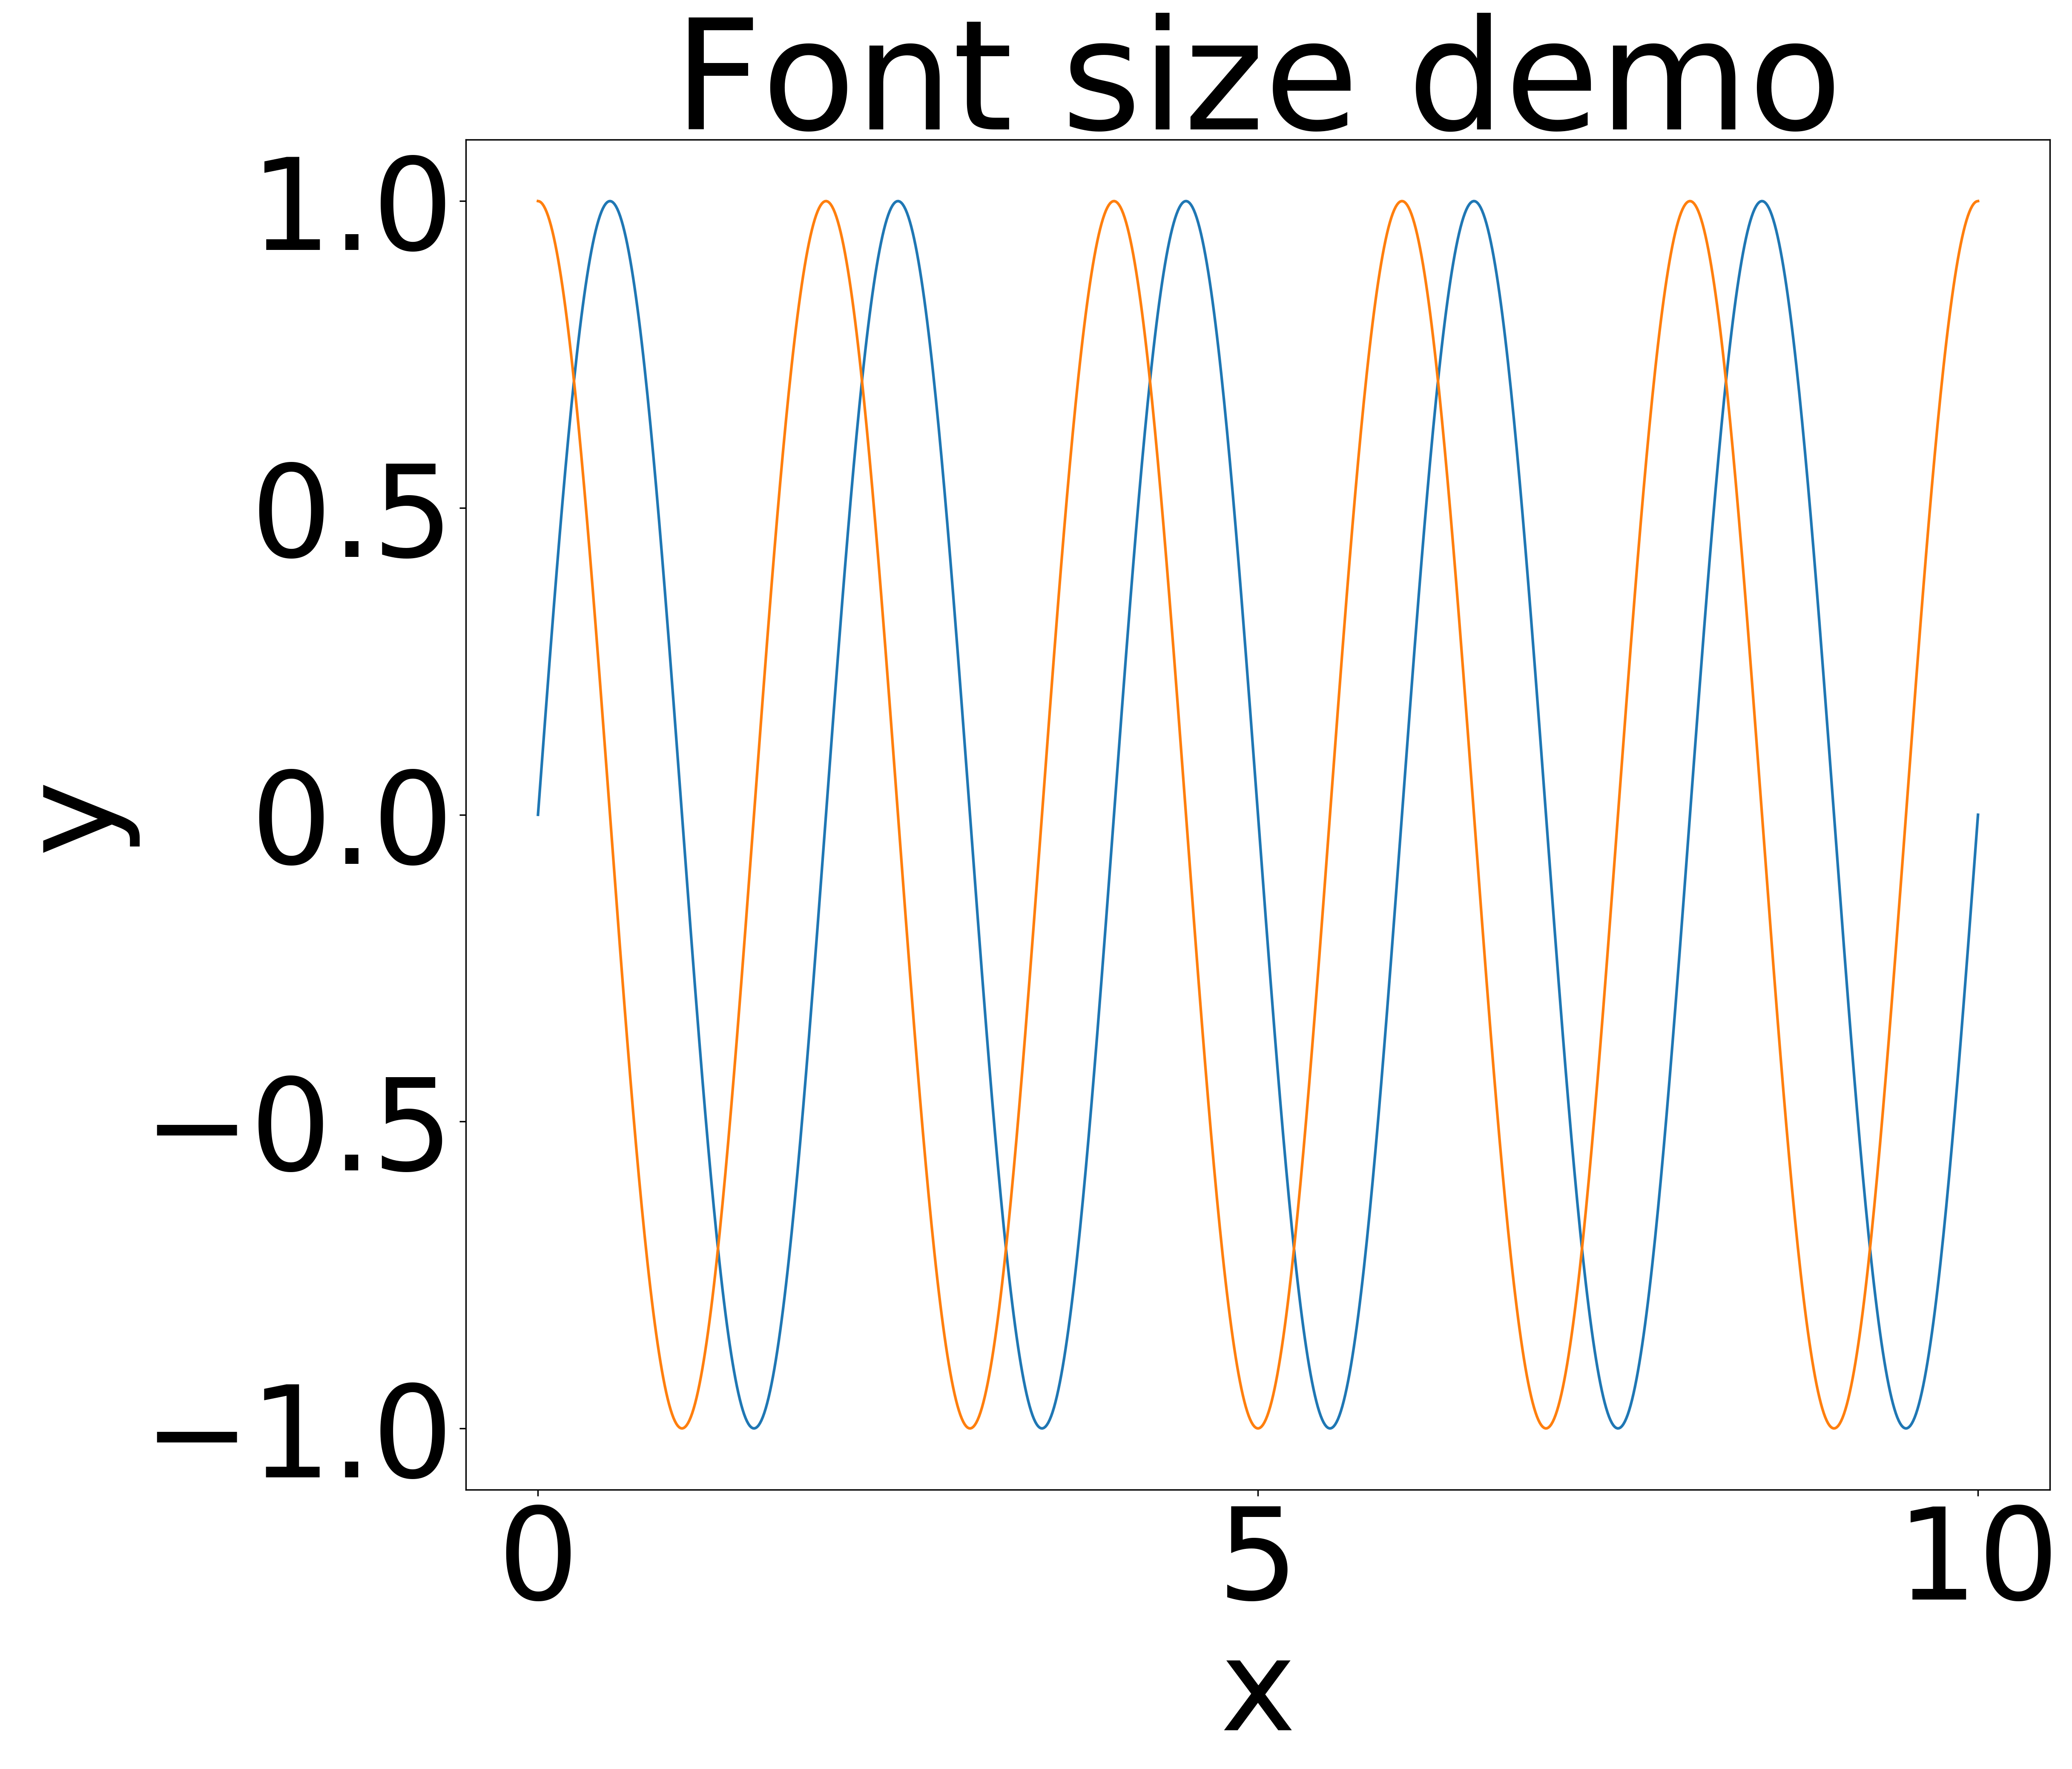

In [161]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 72

x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots(1,figsize=(16,14))
ax.plot(x, np.sin(np.pi*x), label='sin(x)', linewidth=1.5)
ax.plot(x, np.cos(np.pi*x), label='cos(y)', linewidth=1.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Font size demo')

In [162]:
image_link('demo.png')

font.size:
when I drag the pic(font.size = 72) to ppt, word or acrbat, I found ticks font sizes are equal to one software sets to 72pt, while title is appro 1.25 larger(appro 90)

![](https://ws1.sinaimg.cn/large/006tNc79ly1fytgyjn0ucj310e0u0tg0.jpg)

![](https://ws1.sinaimg.cn/large/006tNc79ly1fytg8jhfdej31ct0u0ni9.jpg)

![](https://ws2.sinaimg.cn/large/006tNc79ly1fytgh50o19j31c00u0kfj.jpg)

# how to run

In [170]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 5

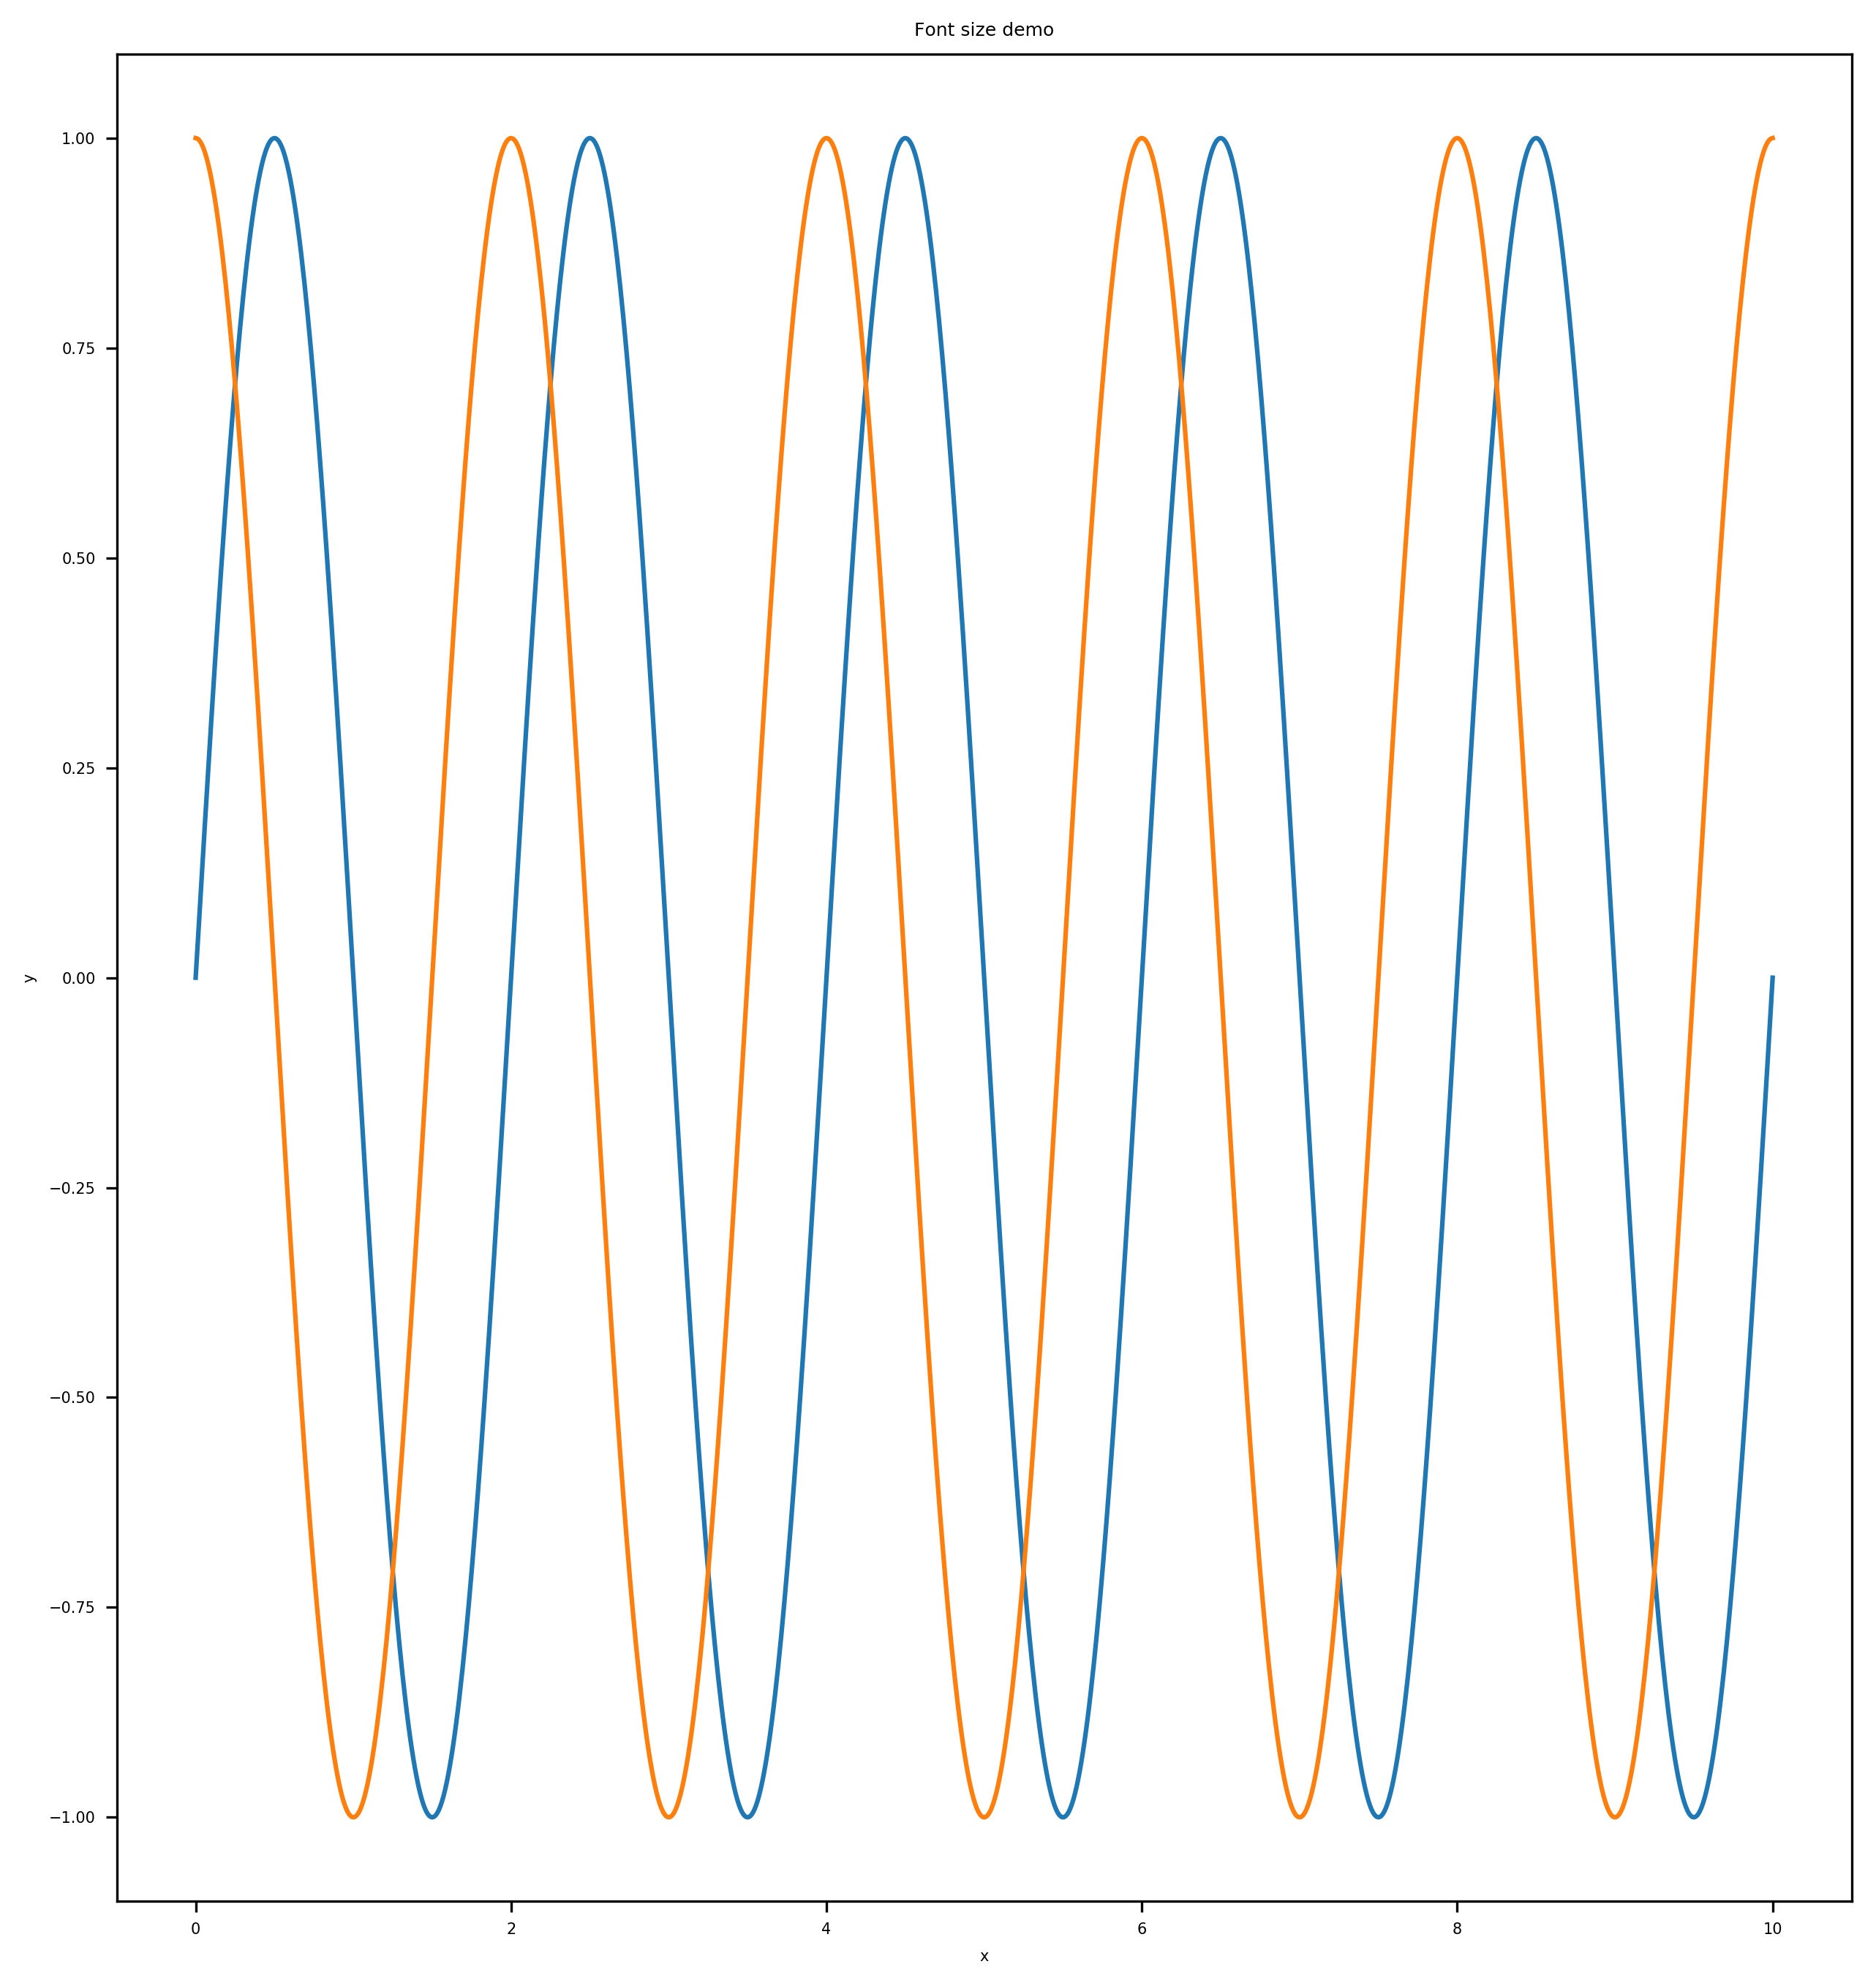

In [171]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots(1,figsize=(8.5,9)) #  according to nature method pic ![](https://ws3.sinaimg.cn/large/006tNc79ly1fythafb0ijj31c00u0kjl.jpg)
ax.plot(x, np.sin(np.pi*x), label='sin(x)', linewidth=1.5)
ax.plot(x, np.cos(np.pi*x), label='cos(y)', linewidth=1.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Font size demo')
fig.tight_layout()

In [172]:
def image_link(filename):
    fig.savefig(filename,dpi=300)
    return HTML('<a href="{0}", target="_blank">{0}</a>'.format(filename))

In [173]:
image_link('demo.png')

the result is good
![](https://ws1.sinaimg.cn/large/006tNc79ly1fythe44u3wj31c10u0x6p.jpg)